In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier

plt.rcParams['figure.figsize'] = (12, 4)

#  Analisis exploratorio ultimos 6 meses año 2017

El analisis exploratorio que se presenta a continuacion tiene como fin determinar que feathers influyen en mayor medida a la hora de determinar el precio de un inmueble en Capital Federal y Gran Buenos Aires, asi como tambien encontrar datos curiosos en el data set.

In [2]:
sell_properati = pd.read_csv('../data/properati-AR-2017-08-01-properties-sell-six_months.csv')

In [3]:
sell_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 27 columns):
id                            121220 non-null object
created_on                    121220 non-null object
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 no

Transformando el formato del feature created_on para manejarlo como fecha

In [4]:
sell_properati['created_on'] = sell_properati['created_on'].apply(lambda x : pd.to_datetime(x))

In [6]:
sell_properati['year'] = sell_properati['created_on'].apply(lambda x : x.year)

In [7]:
sell_properati.year.unique()

array([2017])

In [9]:
sell_properati['year_month'] = sell_properati.created_on.apply(lambda x: str(x.year) + '-' + str(x.month))

In [10]:
sell_properati.year_month.unique()

array(['2017-2', '2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8'], dtype=object)

In [11]:
sell_properati['zone'] = sell_properati.place_with_parent_names.apply(lambda x : x.split('|')[3])

Filtramos por los datos que son reelevantes para nuestro analisis, obteniendo unicamente las propiedades de GBA y capital federal

In [12]:
sell_properati = sell_properati[
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Norte' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Sur' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Oeste' ) |
    (sell_properati['state_name'] == 'Capital Federal' ) 
    ]

In [13]:
sell_properati.count()

id                            81150
created_on                    81150
operation                     81150
property_type                 81150
place_name                    81127
place_with_parent_names       81150
country_name                  81150
state_name                    81150
geonames_id                   63896
lat-lon                       46794
lat                           46794
lon                           46794
price                         72494
currency                      72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           58358
surface_covered_in_m2         72645
price_usd_per_m2              51635
price_per_m2                  66015
floor                          5644
rooms                         29939
expenses                      12083
properati_url                 81150
description                   81149
title                         81150
image_thumbnail               79479
year                        

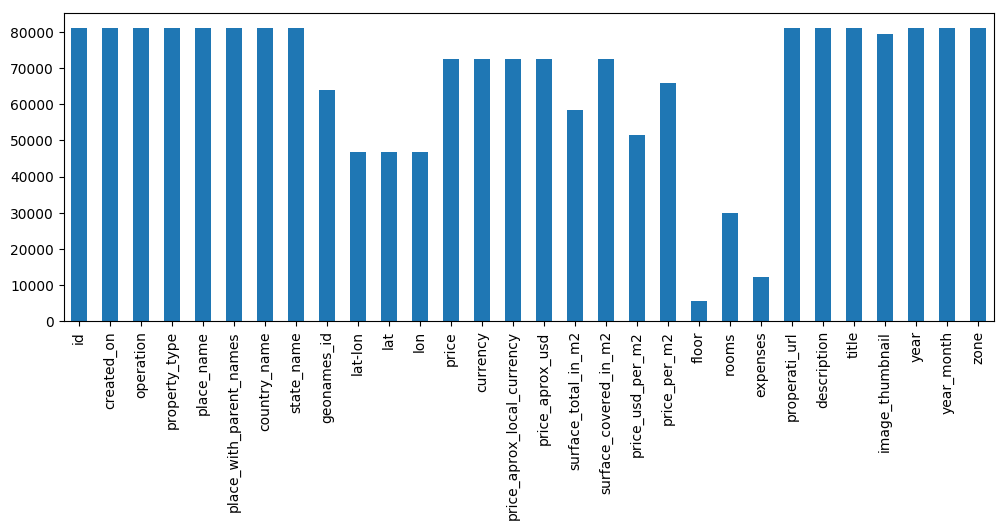

In [14]:
sell_properati.count().plot(kind='bar')

In [15]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array(['Tigre'], dtype=object)

#### Las propiedades del tigre son las unicas que no contienen informacion en 'place_name'

In [16]:
sell_properati.loc[pd.isnull(sell_properati['place_name']),'place_name'] = sell_properati.place_name.apply(lambda x : x if pd.notnull(x) else 'Tigre' )

In [17]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array([], dtype=object)

In [18]:
sell_properati.shape

(81150, 30)

In [19]:
sell_properati.groupby(by='id').count().shape

(81150, 29)

sell_properati.drop(inplace=True,labels=['id','operation','country_name','properati_url','description','image_thumbnail','title'],axis=1)

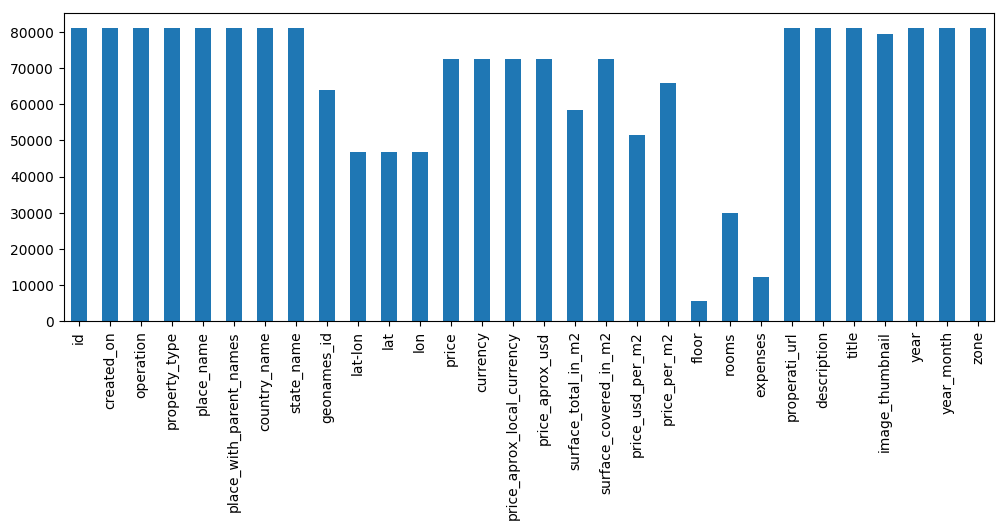

In [20]:
sell_properati.count().plot.bar()

In [21]:
sell_properati.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

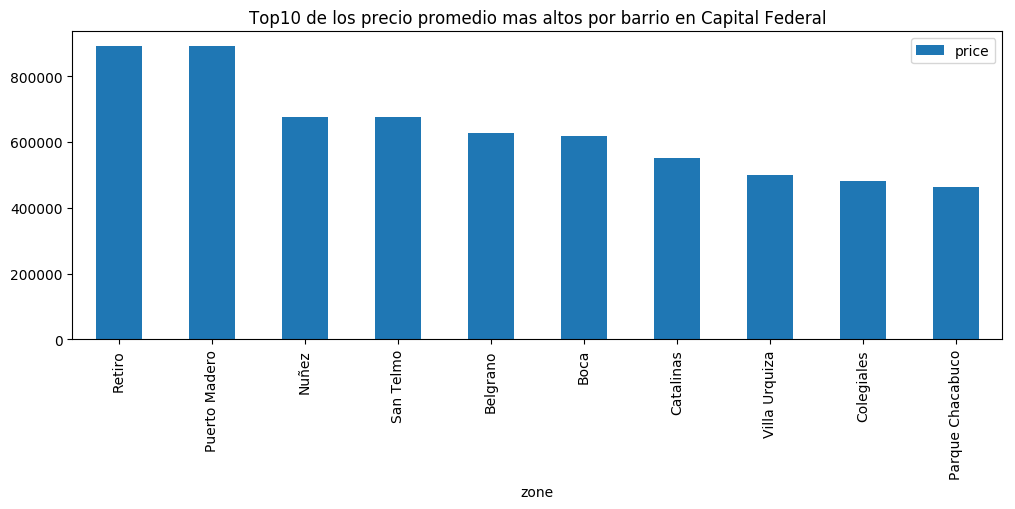

In [22]:
sell_properati[   (sell_properati['property_type'] == 'apartment') & \
                  (sell_properati['state_name'] == 'Capital Federal' )
              ].groupby(by='zone').mean()\
                .reset_index().sort_values(by='price',ascending=False).head(10)\
                .plot.bar(y='price',x='zone',title='Top10 de los precio promedio mas altos por barrio en Capital Federal')

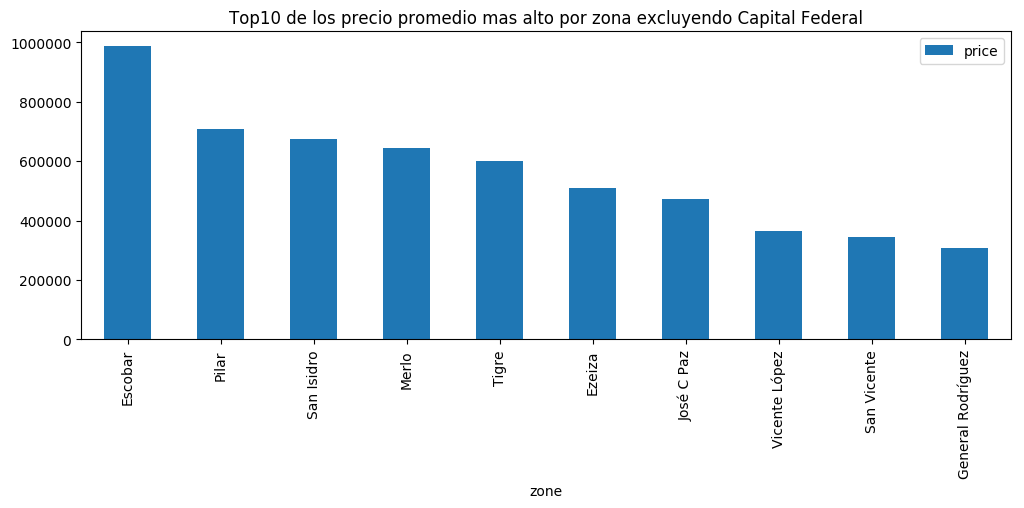

In [23]:
sell_properati[   (sell_properati['property_type'] == 'apartment') & \
                  (sell_properati['state_name'] != 'Capital Federal' )
              ].groupby(by='zone').mean()\
                .reset_index().sort_values(by='price',ascending=False).head(10)\
                .plot.bar(y='price',x='zone',title='Top10 de los precio promedio mas alto por zona excluyendo Capital Federal')

### A continuacion vamos a trabajar con los precios de las propiedades

In [24]:
price_sell_properati = sell_properati[['place_name','property_type','currency','price','price_aprox_local_currency','price_aprox_usd',\
                                       'surface_total_in_m2','surface_covered_in_m2','price_per_m2','price_usd_per_m2']]

In [25]:
price_sell_properati.shape

(81150, 10)

In [26]:
price_sell_properati.count()

place_name                    81150
property_type                 81150
currency                      72494
price                         72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           58358
surface_covered_in_m2         72645
price_per_m2                  66015
price_usd_per_m2              51635
dtype: int64

In [27]:
price_sell_properati[pd.isnull(price_sell_properati['currency'])].sample(5)

,place_name,property_type,currency,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
66860,Palermo,apartment,NaN,NaN,NaN,NaN,42.0,39.0,NaN,NaN
23083,Bs.As. G.B.A. Zona Sur,apartment,NaN,NaN,NaN,NaN,83.0,83.0,NaN,NaN
47791,La Plata,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3278,Los Pingüinos Country Club,house,NaN,NaN,NaN,NaN,1050.0,220.0,NaN,NaN
2032,Morón,apartment,NaN,NaN,NaN,NaN,90.0,85.0,NaN,NaN


In [28]:
price_sell_properati[pd.isnull(price_sell_properati['currency'])].count()

place_name                    8656
property_type                 8656
currency                         0
price                            0
price_aprox_local_currency       0
price_aprox_usd                  0
surface_total_in_m2           6561
surface_covered_in_m2         6628
price_per_m2                     0
price_usd_per_m2                 0
dtype: int64

Debemos excluir los datos que tienen no tienen datos sobre 'currency' ya que no nos brindan ninguna informacion y ademas afecta el resultado real puesto que no tienen datos sobre el precio y la superficie por lo cual no se pueden sacar muchas conclusiones de esto.

In [29]:
price_sell_properati = price_sell_properati[pd.notnull(price_sell_properati['currency'])]

In [30]:
price_sell_properati[pd.isnull(price_sell_properati['price']) ].shape[0]

0

In [31]:
price_sell_properati[pd.isnull(price_sell_properati['price_aprox_local_currency']) ].shape[0]

0

In [32]:
price_sell_properati[pd.isnull(price_sell_properati['price_aprox_usd']) ].shape[0]

0

In [33]:
price_sell_properati[pd.isnull(price_sell_properati['surface_total_in_m2']) ].shape[0]

20697

In [34]:
price_sell_properati[pd.isnull(price_sell_properati['surface_covered_in_m2']) ].shape[0]

6477

In [35]:
price_sell_properati[pd.isnull(price_sell_properati['price_per_m2']) ].shape[0]

6479

In [36]:
price_sell_properati[pd.isnull(price_sell_properati['price_usd_per_m2']) ].shape[0]

20859

In [37]:
price_sell_properati[pd.isnull(price_sell_properati['price_per_m2']) ].groupby(by='currency').count()

,place_name,property_type,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
currency,,,,,,,,,
ARS,222,222,222,222,222,81,0,0,49
PEN,2,2,2,2,2,0,0,0,0
USD,6255,6255,6255,6255,6255,2749,2,0,2619


In [38]:
price_sell_properati.groupby(by='currency').count()

,place_name,property_type,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
currency,,,,,,,,,
ARS,2932,2932,2932,2932,2932,2339,2710,2710,2307
PEN,2,2,2,2,2,0,0,0,0
USD,69560,69560,69560,69560,69560,49458,63307,63305,49328


 Queremos estudiar el precio en dolares de los inmuebles por lo cual la informacion que mas nos interesa es **price, price_aprox_usd, price_per_m2, surface_total_in_m2 y price_usd_por_m2 **, teniendo en cuenta estas 5 columna se podria completar gran parte de los datos para tener la mayor presicion posible al realizar el analisis exploratorio. 

Se van a estimar los datos de los precios publicados en [PEN](https://es.wikipedia.org/w/index.php?title=Nuevo_sol) ya que no aportan informacion sobre los metros cuadrados de las propiedades

In [39]:
price_sell_properati.count()

place_name                    72494
property_type                 72494
currency                      72494
price                         72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           51797
surface_covered_in_m2         66017
price_per_m2                  66015
price_usd_per_m2              51635
dtype: int64

### Calculamos la superficie total en metros cuadrados de las propiedades que no cuentan con este dato

In [40]:
price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price']) ) & \
                        (pd.notnull(price_sell_properati['price_per_m2'])) ,'surface_total_in_m2'] = \
    price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price']) ) & \
                        (pd.notnull(price_sell_properati['price_per_m2']))].price / \
    price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price']) ) & \
                        (pd.notnull(price_sell_properati['price_per_m2']))].price_per_m2

### Calculamos el precio por metro cuadrado en USD de los inmuebles que no cuentan con dicha informacion

In [41]:
price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price_aprox_usd'])) ,'price_usd_per_m2'] = \
    price_sell_properati.loc[                        
                        (pd.isnull(price_sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price_aprox_usd']))].price_aprox_usd / \
    price_sell_properati.loc[                        
                        (pd.isnull(price_sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price_aprox_usd'])) ].surface_total_in_m2

### Se agrega el precio por metro cuadrado en la moneda actual en cada unos de las pripiedades

In [42]:
price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['price_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price'])) ,'price_per_m2'] = \
    price_sell_properati.loc[ 
                        (pd.isnull(price_sell_properati['price_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price'])) ].price / \
    price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['price_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price'])) ].surface_total_in_m2

In [43]:
price_sell_properati.count()

place_name                    72494
property_type                 72494
currency                      72494
price                         72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           68845
surface_covered_in_m2         66017
price_per_m2                  68845
price_usd_per_m2              68845
dtype: int64

Ahora contamos con la informacion mucho mas completa para poder realizar un analisis exploratorio mas preciso

### ¿Que tipo de propiedades son las que no tienen informacion sobre los metros cuadrados cubiertos?

In [73]:
price_sell_properati[pd.isnull(price_sell_properati['surface_covered_in_m2'])].groupby(by='property_type').count()

,place_name,currency,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
property_type,,,,,,,,,
PH,455,455,455,455,455,136,0,136,136
apartment,2960,2960,2960,2960,2960,1583,0,1583,1583
house,2629,2629,2629,2629,2629,884,0,884,884
store,433,433,433,433,433,225,0,225,225


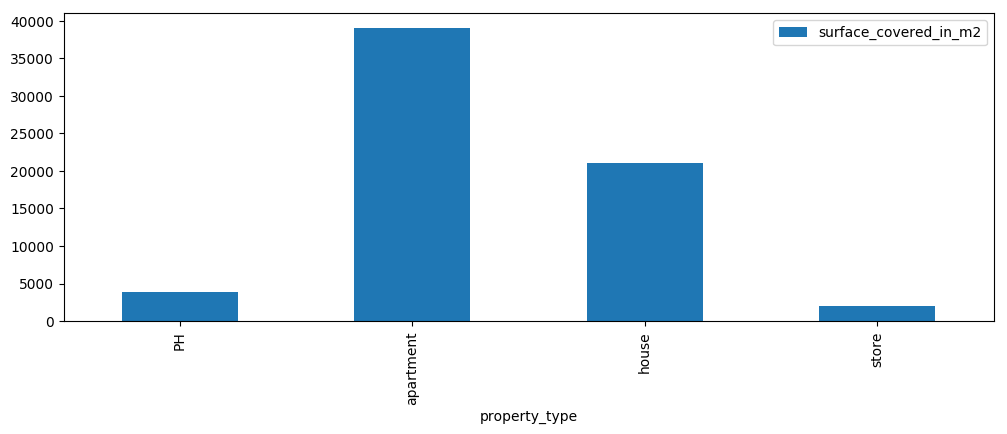

In [77]:
price_sell_properati.groupby(by='property_type').count().reset_index().plot.bar(x='property_type',y='surface_covered_in_m2')

###### Hay todo tipo de propiedades que no cuentan con la informacion de los metros cuadrados cubiertos, por lo cual no podemos sacar ninguna informacion reelevante. 

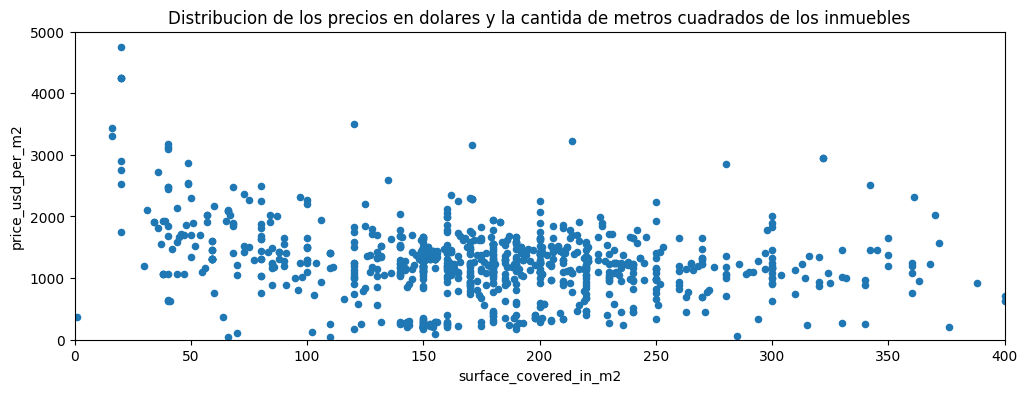

In [65]:
ax = plt.subplot(111)
ax.set_xlim(0,400)
ax.set_ylim(0,5000)
price_sell_properati[price_sell_properati['place_name'] == 'Escobar']\
                .plot.scatter(x='surface_covered_in_m2',y='price_usd_per_m2',ax=ax,\
                title='Distribucion de los precios en dolares y la cantida de metros cuadrados de los inmuebles')


In [47]:
sell_properati

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,year,year_month,zone
0,ad916bad59cdaf3c24c2d594547aa6067c4d6289,2017-02-01,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",...,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,2017,2017-2,Mataderos
1,0de2ae882e1708c2941a672402f772ec83a92827,2017-02-01,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",...,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,2017,2017-2,La Plata
2,61cb773b63b911ad2ea5c823187d7ba1c7f3cadf,2017-02-01,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",...,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,2017,2017-2,Mataderos
3,5f9403a3bac230379afec9a2601bd6e3db3bc0b9,2017-02-01,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",...,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,2017,2017-2,Liniers
6,17fff80b5c788fcf56b8714c7ef96755039fbd28,2017-02-01,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",...,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...,2017,2017-2,Vicente López
7,0955112ee519f7f80496e495187595fd91177b3c,2017-02-01,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,2017,2017-2,Belgrano
8,e421fd04e1d202cad203372bd3ea7fd448155553,2017-02-01,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,2017,2017-2,Belgrano
11,929def9f7fdda3eaa149267651169b4e09c49a3e,2017-02-01,sell,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",...,NaN,NaN,NaN,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,https://thumbs4.properati.com/4/pH0MnS_2zCGOHR...,2017,2017-2,San Miguel
12,813ac9e9db7f9b72475aeb9db2518dbd1ddc8401,2017-02-01,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,"-34.4860195,-58.5038139",...,NaN,NaN,NaN,http://www.properati.com.ar/15bp4_venta_depart...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,https://thumbs4.properati.com/6/wgSui4rTYqPncO...,2017,2017-2,San Isidro
13,ae0d3e36fac1fa60148d7f747b0d8c7c65f2db78,2017-02-01,sell,apartment,Palermo Soho,|Argentina

In [48]:
sell_properati.loc[
                        (pd.isnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price']) ) & \
                        (pd.notnull(sell_properati['price_per_m2'])) ,'surface_total_in_m2'] = \
    sell_properati.loc[
                        (pd.isnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price']) ) & \
                        (pd.notnull(sell_properati['price_per_m2']))].price / \
    sell_properati.loc[
                        (pd.isnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price']) ) & \
                        (pd.notnull(sell_properati['price_per_m2']))].price_per_m2

In [49]:
sell_properati.loc[
                        (pd.isnull(sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price_aprox_usd'])) ,'price_usd_per_m2'] = \
    sell_properati.loc[                        
                        (pd.isnull(sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price_aprox_usd']))].price_aprox_usd / \
    sell_properati.loc[                        
                        (pd.isnull(sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price_aprox_usd'])) ].surface_total_in_m2

In [50]:
sell_properati.loc[
                        (pd.isnull(sell_properati['price_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price'])) ,'price_per_m2'] = \
    sell_properati.loc[ 
                        (pd.isnull(sell_properati['price_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price'])) ].price / \
    sell_properati.loc[
                        (pd.isnull(sell_properati['price_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price'])) ].surface_total_in_m2

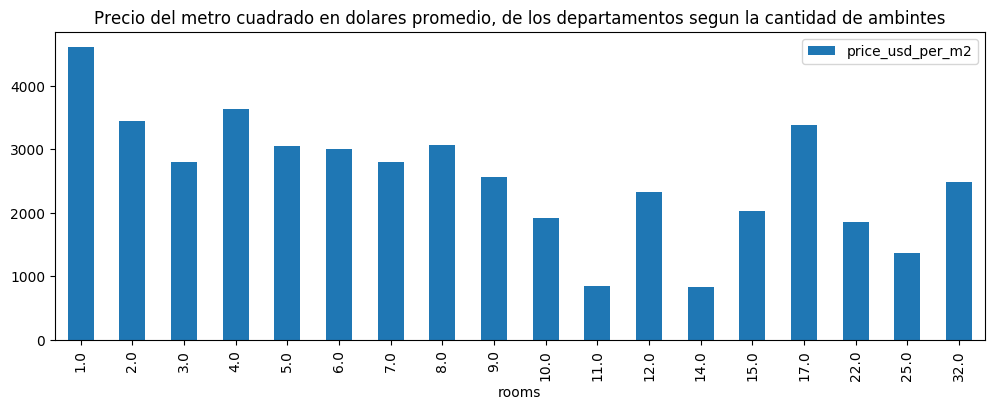

In [60]:
sell_properati[sell_properati['property_type'] == 'apartment'].groupby(by='rooms').mean().reset_index()\
.plot.bar(x='rooms',y='price_usd_per_m2',title='Precio del metro cuadrado en dolares promedio, de los departamentos segun la cantidad de ambintes')

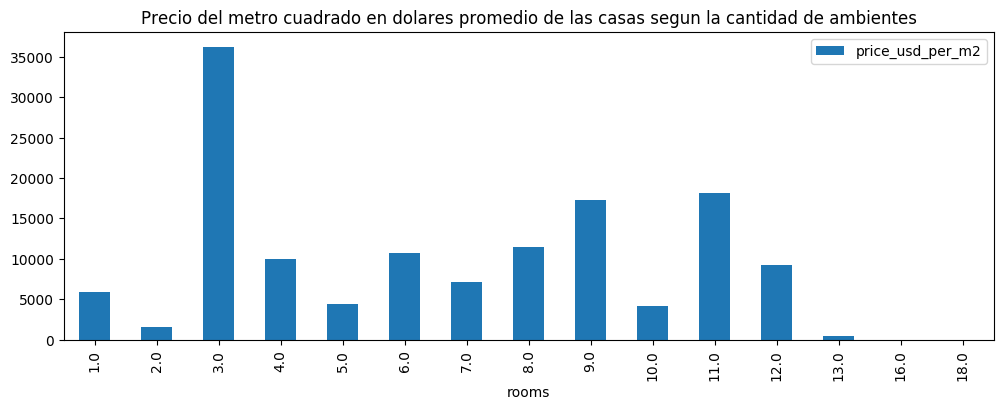

In [58]:
sell_properati[sell_properati['property_type'] == 'house'].groupby(by='rooms').std().reset_index()\
.plot.bar(x='rooms',y='price_usd_per_m2',title='Precio del metro cuadrado en dolares promedio de las casas segun la cantidad de ambientes')

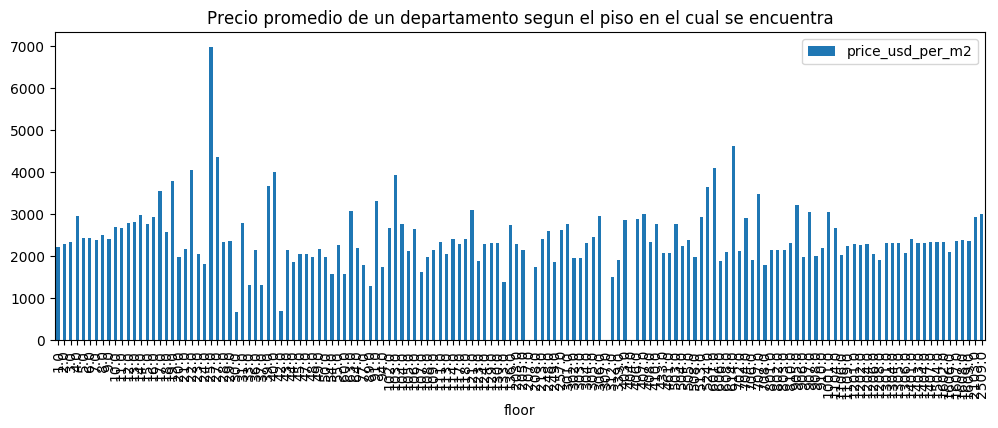

In [56]:
sell_properati[sell_properati['property_type'] == 'apartment'].groupby(by='floor').mean().reset_index()\
.plot.bar(x='floor',y='price_usd_per_m2',title='Precio promedio de un departamento segun el piso en el cual se encuentra')

Esta imagen muestra la anomalia en cuanto al piso en el cual se encuentra un departamento, por lo cual se decidio ver mas en profundidad cuales son los numeros de habitaciones que hay en este set de datos

In [55]:
sell_properati[sell_properati['property_type'] == 'apartment'].floor.describe()

count    5316.000000
mean       20.423439
std       127.635067
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max      2509.000000
Name: floor, dtype: float64

In [54]:
sell_properati[sell_properati['property_type'] == 'apartment'].floor.unique().astype(int)

array([-9223372036854775808,                    2,                    1,
                         12,                    6,                    3,
                          4,                    7,                    8,
                          9,                   10,                    5,
                         11,                   13,                   14,
                         15,                   40,                   25,
                         18,                   27,                  408,
                         20,                   42,                   17,
                         30,                  111,                 1606,
                        906,                 1304,                  606,
                        907,                 1201,                 1104,
                        803,                 1202,                  303,
                        704,                 1109,                  304,
                       1206,                 1602, 

Como se puede ver, es muy extraño este patron ya que hay "aparment" que se encuentran en el piso 2509 lo cual implica que haya algun edificio con esa cantidad de pisos en la ciudad o el gran buenos aires.